# Introduction

Tập dữ liệu Melbourne Housing Market dùng để dự đoán giá nhà.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\Admin\Desktop\data\Melbourne_housing_FULL.csv")

In [3]:
data.shape

(34857, 21)

Dữ liệu gồm 34857 hàng và 21 cột

In [4]:
pd.set_option('display.max_columns', 30)
data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Dữ liệu bao gồm cả dạng số và category.


Mô tả về dữ liệu:

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [5]:
data.describe(percentiles=np.arange(0, 1, 0.1))

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
0%,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
10%,2.000000,4.853000e+05,3.800000,3024.000000,2.000000,1.000000,1.000000,0.000000,73.00000,1910.000000,-37.919200,144.868480,2674.000000
20%,2.000000,5.946000e+05,5.600000,3042.000000,2.000000,1.000000,1.000000,179.000000,94.00000,1930.000000,-37.878900,144.912190,3650.000000
30.0%,3.000000,6.780000e+05,7.300000,3058.000000,3.000000,1.000000,1.000000,276.000000,109.00000,1950.000000,-37.852200,144.953790,4836.000000
40%,3.000000,7.700000e+05,8.500000,3073.000000,3.000000,1.000000,1.000000,385.000000,121.00000,1960.000000,-37.830930,144.988410,5556.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000


Nhiều feature của tập dữ liệu bị missing values, nhiều nhất là BuildingArea và YearBuilt.

Các feature chứa các dữ liệu có thể gây nhiễu: Room 90% có giá trị là nhỏ hơn 4, giá trị max là 16,  các giá trị lớn hơn 4 có thể là nhiễu.

Tương tự với các feature Bedroom2, Bathroom, Car, Landsize

# Missing values and noise
#####  Tỷ lệ  missing values của các feature

In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

BuildingArea và YearBuilt chứa missing values lơn lần lượt là 60% và 55%. Ta sẽ loại bỏ những feature này.

Address, SellerG, Date chứa nhiều giá trị khác nhau nên ta sẽ loại bỏ nó.

In [7]:
data = data.drop(columns=['BuildingArea', 'YearBuilt', 'Address', 'SellerG', 'Date'])

In [8]:
data.shape

(34857, 16)

Distance, Postcode, Regionname và Propertycount chứa tỷ lệ missing values nhỏ hơn 0.003%. Ta sẽ loại bỏ các hàng chưa missing value.

In [9]:
data = data.drop(data[data['Distance'].isnull()].index)
data = data.drop(data[data['Postcode'].isnull()].index)
data = data.drop(data[data['Regionname'].isnull()].index)
data = data.drop(data[data['Propertycount'].isnull()].index)
data.shape

(34854, 16)

##### Price

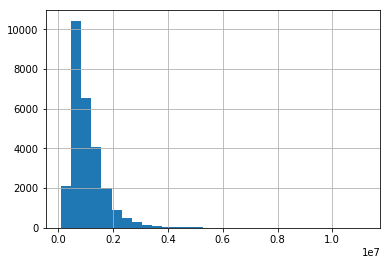

In [10]:
data.Price.hist(bins=30)

Phần lớn giá nhà nằm nhỏ hơn 4 000 000, những giá trị lớn hơn nhiều 4 000 000 chiếm số lượng nhỏ có thể gây nhiễu, remove những ngôi nhà có giá lơn hơn 6 000 000

In [11]:
data = data.drop(data[data['Price'] > 4000000].index)

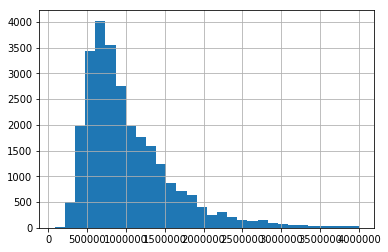

In [12]:
data.Price.hist(bins=30)

Xử lý missing value

Gán giá trị trung bình vào những nới có missing values trong feature Price

In [13]:
price_avg = data['Price'].mean()
data['Price'] = data['Price'].fillna(price_avg)

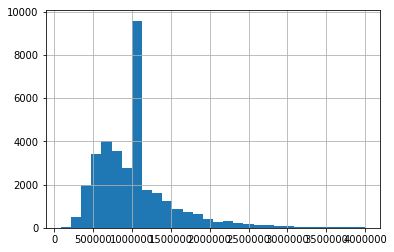

In [14]:
data.Price.hist(bins=30)

##### Rooms

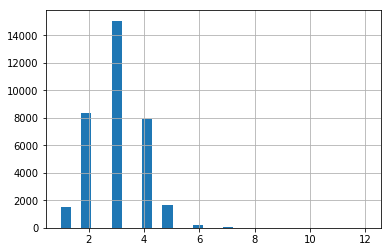

In [15]:
data.Rooms.hist(bins=30)

In [16]:
data.Rooms.value_counts()

3     15068
2      8328
4      7898
5      1688
1      1479
6       196
7        30
8        19
10        6
9         4
12        2
Name: Rooms, dtype: int64

Số lượng căn nhà có gia trị Rooms lớn hơn 5 là rất nhỏ so với tổng thể, có thê gây nhiễu. Ta sẽ loại bỏ những căn nhà có giá trị Rooms lớn hơn 5

In [17]:
data = data[data['Rooms']<6]

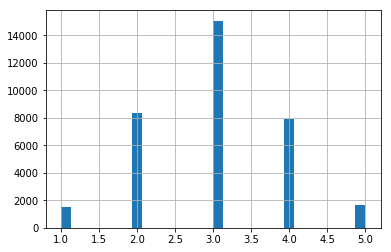

In [18]:
data.Rooms.hist(bins=30)

Rooms không chứa missing values

##### Bedroom2

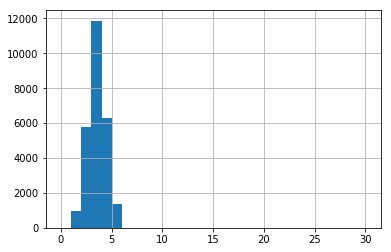

In [19]:
data.Bedroom2.hist(bins=30)

In [20]:
data.Bedroom2.value_counts()

3.0     11871
4.0      6295
2.0      5775
5.0      1379
1.0       965
0.0        17
6.0         5
10.0        2
9.0         2
30.0        1
7.0         1
20.0        1
8.0         1
Name: Bedroom2, dtype: int64

Phần lớn Bedroom2 có giá trị từ 1 đến 5, ta sẽ loại bỏ các những dòng chứa giá trị Bedroom2 khác.

In [21]:
data = data.drop(data[data['Bedroom2'] > 5].index)

In [22]:
data = data.drop(data[data['Bedroom2'] < 1].index)

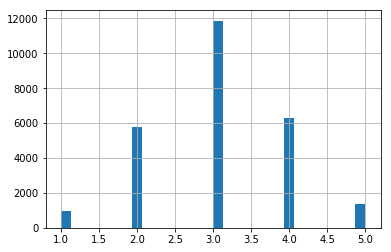

In [23]:
data.Bedroom2.hist(bins=30)

Gán giá trị bằng 3 cho missing values của feature Bedroom2

In [24]:
data['Bedroom2'] = data['Bedroom2'].fillna(3)

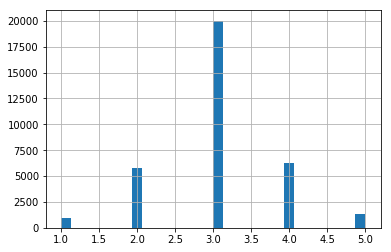

In [25]:
data.Bedroom2.hist(bins=30)

##### Bathroom

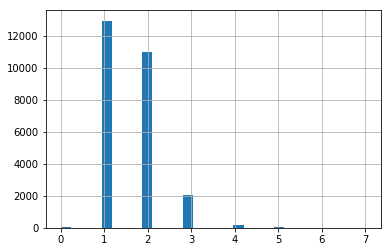

In [26]:
data.Bathroom.hist(bins=30)

In [27]:
data.Bathroom.value_counts()

1.0    12952
2.0    10978
3.0     2028
4.0      206
5.0       68
0.0       38
6.0        4
7.0        2
Name: Bathroom, dtype: int64

Các ngôi nhà thường từ 1 đến 3 Bathroom. Loại bỏ những ngôi nhà có số Bathroom lớn hơn 3 và nhỏ hơn 1.

In [28]:
data = data.drop(data[data['Bathroom'] > 3].index)
data = data.drop(data[data['Bathroom'] < 1].index)

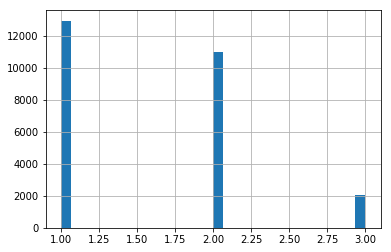

In [29]:
data.Bathroom.hist(bins=30)

Gán giá trị Bathroom bằng 1 hoặc 2 cho missing values của feature Bathroom do số lượng các phòng có Bathroom bằng 1 và 2 gần bằng nhau

In [30]:
data['Bathroom'] = data['Bathroom'].apply(lambda x: np.random.choice([x for x in range(1, 3)]) if (np.isnan(x)) else x)

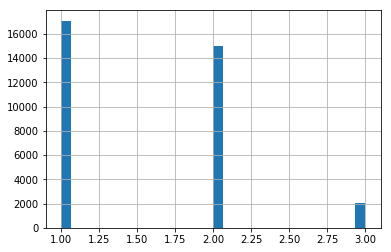

In [31]:
data.Bathroom.hist(bins=30)

##### Car

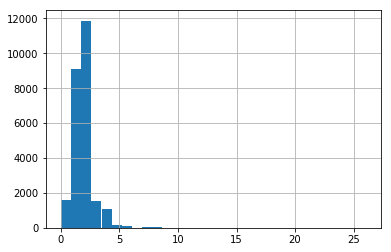

In [32]:
data.Car.hist(bins=30)

In [33]:
data.Car.value_counts()

2.0     11866
1.0      9124
0.0      1573
3.0      1514
4.0      1069
5.0       132
6.0       130
7.0        21
8.0        20
10.0        5
9.0         3
11.0        2
26.0        1
18.0        1
Name: Car, dtype: int64

Hầu hết những ngôi nhà đều có giá trị Car nhỏ hơn 7. Các giá trị khác có thể gây nhiễu. Loại bỏ những dòng có giá trị Car lớn hơn 6

In [34]:
data = data.drop(data[data['Car'] > 6].index)

Gán giá trị Car bằng 2 cho missing values của feature Car.

In [35]:
data['Car'] = data['Car'].fillna(2)

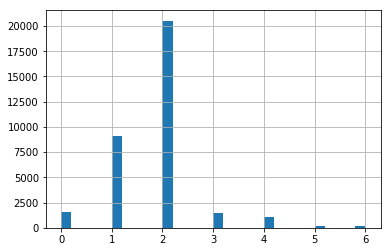

In [36]:
data.Car.hist(bins=30)

##### Landsize

In [37]:
data[data['Landsize'] > 2000].shape

(341, 16)

Những ngôi nhà có Landsize lớn hơn 2000 chiếm số lượng nhỏ, ta sẽ loại bỏ những dòng này.

In [38]:
data = data.drop(data[data['Landsize'] > 2000].index)

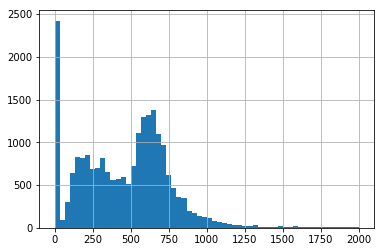

In [39]:
data.Landsize.hist(bins=60)

In [40]:
data[data['Landsize'] == 0].shape[0]

2404

Có rất nhiều ngôi nhà với Landsize bằng 0

Gán giá trị trung bình cho những missing values của Landsize

In [41]:
landsize_avg = data['Landsize'].mean()
data['Landsize'] = data['Landsize'].fillna(landsize_avg)

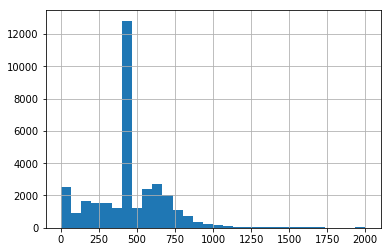

In [42]:
data.Landsize.hist(bins=30)

##### Lattitude

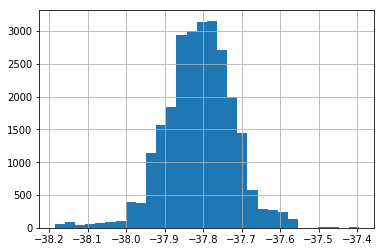

In [43]:
data.Lattitude.hist(bins=30)

Gán giá trị trung bình cho những missing values của Lattitude

In [44]:
lattitude_avg = data['Lattitude'].mean()
data['Lattitude'] = data['Lattitude'].fillna(lattitude_avg)

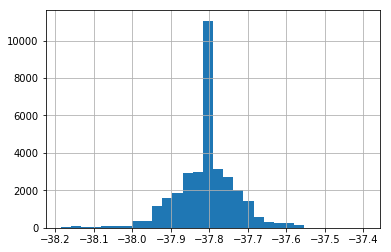

In [45]:
data.Lattitude.hist(bins=30)

##### Longtitude

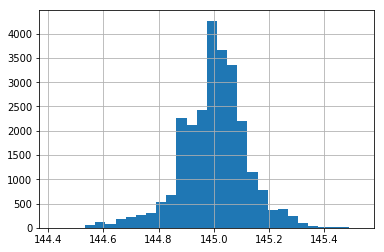

In [46]:
data.Longtitude.hist(bins=30)

Gán giá trị trung bình cho những missing values của Longtitude

In [47]:
longtitude_avg = data['Longtitude'].mean()
data['Longtitude'] = data['Longtitude'].fillna(longtitude_avg)

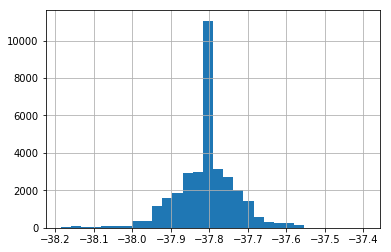

In [48]:
data.Lattitude.hist(bins=30)

# Visualization

In [49]:
columns = ['Rooms', 'Price',  'Lattitude', 'Longtitude', 'Car', 'Bathroom',
           'Bedroom2', 'Distance', 'Landsize', 'Propertycount']

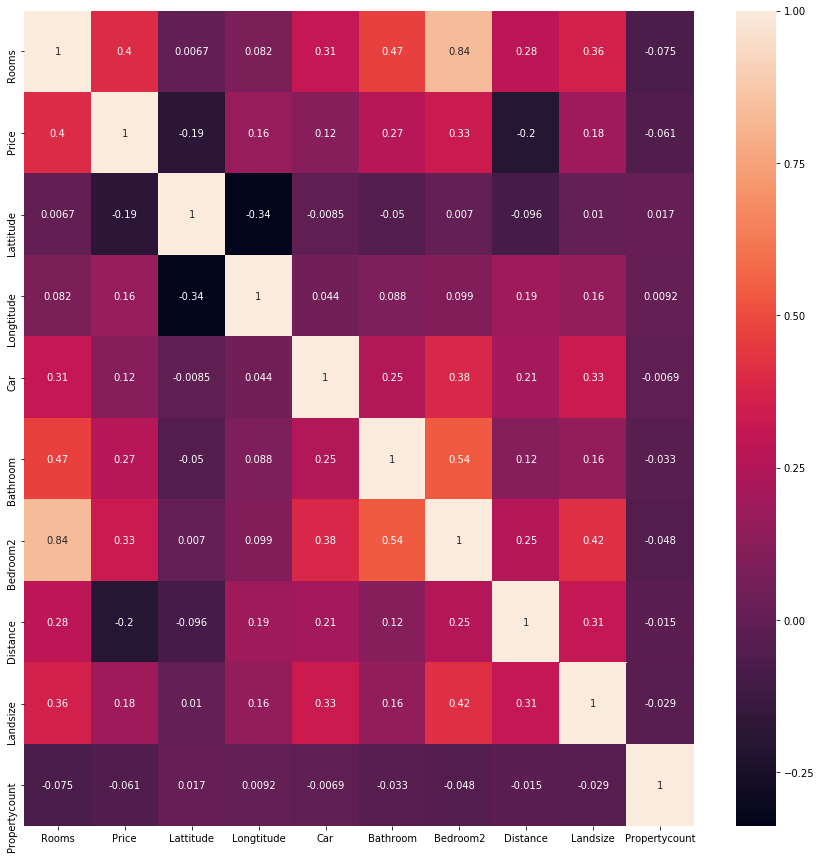

In [50]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data[columns].corr(), annot=True)

Rooms có sự tương quan lớn với Bedroom2. Ta có thể bỏ feature Bedroom2.

Price có sự tương quan vởi Rooms, Bathroom, Bedroom2

In [51]:
data = data.drop(columns=['Bedroom2'])

# Normalization 

In [52]:
scaler = MinMaxScaler()

columns = ['Rooms', 'Lattitude', 'Longtitude', 'Car',
           'Bathroom', 'Distance', 'Landsize', 'Propertycount']
data[columns] = scaler.fit_transform(data[columns])

C:\Users\Admin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Chuẩn hóa các dữ liệu số bằng phương pháp MinMaxScaler

In [53]:
data.head()

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,0.25,h,1.030098e+06,SS,0.051975,3067.0,0.0,0.166667,0.063,Yarra City Council,0.486022,0.518802,Northern Metropolitan,0.180754
1,Abbotsford,0.25,h,1.480000e+06,S,0.051975,3067.0,0.0,0.166667,0.101,Yarra City Council,0.488299,0.521160,Northern Metropolitan,0.180754
2,Abbotsford,0.25,h,1.035000e+06,S,0.051975,3067.0,0.0,0.000000,0.078,Yarra City Council,0.477799,0.516625,Northern Metropolitan,0.180754
3,Abbotsford,0.50,u,1.030098e+06,VB,0.051975,3067.0,0.5,0.166667,0.000,Yarra City Council,0.473371,0.533132,Northern Metropolitan,0.180754
4,Abbotsford,0.50,h,1.465000e+06,SP,0.051975,3067.0,0.5,0.000000,0.067,Yarra City Council,0.476028,0.517532,Northern Metropolitan,0.180754


### Chuyển các dữ liệu dạng category về onehot encoding

In [54]:
data_ohe = data
columns = ['Suburb', 'Type', 'Method', 'CouncilArea', 'CouncilArea', 'Regionname']

In [55]:
for i in columns:
    dfDummies = pd.get_dummies(data_ohe[i], prefix = i)
    data_ohe = pd.concat([data_ohe, dfDummies], axis=1)

In [56]:
data_ohe = data_ohe.drop(columns=columns)
pd.set_option('display.max_columns', 100)
data_ohe.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Avonsleigh,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,...,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Banyule City Council,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.25,1.030098e+06,0.051975,3067.0,0.0,0.166667,0.063,0.486022,0.518802,0.180754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0.25,1.480000e+06,0.051975,3067.0,0.0,0.166667,0.101,0.488299,0.521160,0.180754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.25,1.035000e+06,0.051975,3067.0,0.0,0.000000,0.078,0.477799,0.516625,0.180754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.50,1.030098e+06,0.051975,3067.0,0.5,0.166667,0.000,0.473371,0.533132,0.180754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.50,1.465000e+06,0.051975,3067.0,0.5,0.000000,0.067,0.476028,0.517532,0.180754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [57]:
y = data_ohe['Price']
X = data_ohe.drop(columns=['Price'])

In [58]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
reg = LinearRegression().fit(X_train, y_train)

In [61]:
y_pred = reg.predict(X_test)

In [62]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

MAE: 34909616057.46036
MSE: 1.6486741605524132e+24
RMSE: 1284007071846.7297
R^2 = -7217474828423.316


#### Cross Validation

In [63]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(LinearRegression(), X, y, cv = 10, scoring=['neg_mean_absolute_error',
                                                                    'neg_mean_squared_error', 'r2'])

In [64]:
scores

C:\Users\Admin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Admin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Admin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwar

{'fit_time': array([1.81713772, 1.74156713, 1.88338017, 1.73426223, 1.86986852,
        1.79489207, 1.73766041, 1.63945127, 1.69527197, 1.71641111]),
 'score_time': array([0.03989244, 0.03989339, 0.03013253, 0.05413699, 0.05486012,
        0.0512979 , 0.03125095, 0.03690147, 0.04388189, 0.0408926 ]),
 'test_neg_mean_absolute_error': array([-2.85062829e+05, -2.82694367e+05, -2.29004305e+05, -2.44903760e+05,
        -3.53888631e+10, -1.02710037e+11, -5.49190983e+09, -2.08452633e+09,
        -3.20846473e+10, -2.30862174e+05]),
 'train_neg_mean_absolute_error': array([-231011.4550615 , -231656.52634015, -237995.90820766,
        -235394.11601321, -236397.07752046, -238834.09185589,
        -238000.5823473 , -236297.87179171, -238500.44494786,
        -236933.77511001]),
 'test_neg_mean_squared_error': array([-1.64381575e+11, -1.50665374e+11, -9.81979911e+10, -1.24865820e+11,
        -1.09392691e+24, -9.94105206e+24, -3.83586375e+22, -5.36100791e+21,
        -7.95602145e+23, -1.15357483e+11

In [65]:
mae_scores = - scores['test_neg_mean_absolute_error'].mean()
mae_scores

17776125581.06678

In [66]:
# fix the sign of MSE scores
mse_scores = -scores['test_neg_mean_squared_error'].mean()
print(mse_scores)

1.1874300766687639e+24


In [67]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

1089692652388.1694


In [68]:
r2_scores = scores['test_r2'].mean()
r2_scores

-5733500833069.382

In [69]:
print('MAE:', mae_scores)
print('MSE:', mse_scores)
print('RMSE:', rmse_scores)
print('R^2 =', r2_scores)

MAE: 17776125581.06678
MSE: 1.1874300766687639e+24
RMSE: 1089692652388.1694
R^2 = -5733500833069.382


Sử dụng cross validation làm sai số nhỏ hơn nhiều so với không sử dụng.

Sử dụng Cross validation cho sai số nhỏ hơn khi không sử dụng.

#### Không sử dụng onehot encoding, Chỉ dùng những feature dạng số để dự đoán

In [70]:
data_without_ohe = data[['Rooms', 'Lattitude', 'Longtitude', 'Car',
           'Bathroom', 'Distance', 'Landsize', 'Propertycount', 'Price']]

In [71]:
y_1 = data_without_ohe['Price']
X_1 = data_without_ohe.drop(columns=['Price'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split( X_1, y_1, test_size=0.2)

In [73]:
reg = LinearRegression().fit(X_train, y_train)

In [74]:
y_pred = reg.predict(X_test)

In [75]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

MAE: 286349.0836475894
MSE: 162728841996.10794
RMSE: 403396.63111645833
R^2 = 0.356726346399039


giá trị nhỏ hơn so với sử dụng onehot encoding

# PCA

In [76]:
pca = PCA(n_components=200)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

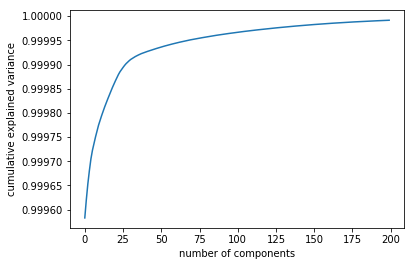

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Chọn số chiều là components là 25

In [78]:
pca = PCA(25)
X_pca = pca.fit_transform(X)
X_pca.shape

(33719, 25)

In [79]:
 X_train, X_test, y_train, y_test = train_test_split( X_pca, y, test_size=0.2)

In [80]:
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [81]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

MAE: 269536.1190253657
MSE: 144445378534.98004
RMSE: 380059.7039084518
R^2 = 0.4085007832685912


Sau khi dung PCA các sai số nhỏ hơn trước khi dùng PCA

# Visualize the residue and homoscedasticity

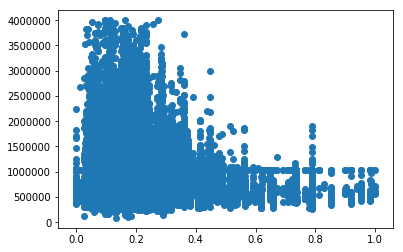

In [82]:
plt.scatter(data['Distance'], data['Price'])

Dữ liệu về Distance không đồng nhất.

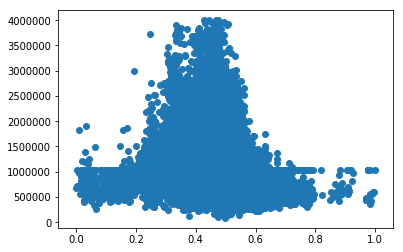

In [83]:
plt.scatter(data['Lattitude'], data['Price'])

Dữ liệu về Lattitude không đồng nhất.

# Turning model

# Conclusions 

Sử dụng PCA giúp giảm số lượng feature, tăng tốc độ, cải thiện được độ chính xác.